In [1]:
import pandas as pd
df = pd.read_csv("MIE1624 - Group Project Course Curriculum.csv")

In [2]:
df_clean = df.copy()

In [3]:
# remove html tags and attributes
df_clean['Course Description'] = df['Course Description'].str.replace('<[^<]+?>', '')
df_clean['Topics'] = df['Topics'].str.replace('<[^<]+?>', '')
df_clean['Skills'] = df['Skills'].str.replace('<[^<]+?>', '')

In [4]:
# replace html character codes
import html
df_clean['Course Description'] = html.unescape(df_clean['Course Description'])
df_clean['Topics'] = html.unescape(df_clean['Topics'])
df_clean['Skills'] = html.unescape(df_clean['Skills'])

In [5]:
df_clean.fillna("")

,Coursera,Course Name,Company,Course Description,Topics,Skills
0,,Introduction to Data Science Specialization,IBM,Interested in learning more about data science...,Describe what data science and machine learnin...,Data Science\nRelational Database Management S...
1,,Introduction to Data Science in Python,University of Michigan,This course will introduce the learner to the ...,Understand techniques such as lambdas and mani...,Python Programming\nNumpy\nPandas\nData Cleansing
2,,Introduction to Data Analytics,IBM,This course presents a gentle introduction int...,,Data Science\nSpreadsheet\nData Analysis\nMicr...
3,,Applied Data Science with Python Specialization,University of Michigan,The 5 courses in this University of Michigan s...,Conduct an inferential statistical analysis\n\...,Text Mining\nPython Programming\nPandas\nMatpl...
4,,Data Analysis Using Python,University of Pennsylvania,This course provides an introduction to basic ...,Apply basic data science techniques using Pyth...,Data Science\nPython Libraries\nPython Program...
...,...,...,...,...,...,...
68,,Big Data Analytics Using Spark,UC San Diego,"In data science, data is called ""big"" if it ca...",Programming Spark using Pyspark\nIdentifying t...,
69,,Data Science: Computational Thinking with Python,Berkeley,We live in an era of unprecedented access to d...,"Basics of the Python programming language, and...",
70,,Statistical Thinking for Data Science and Anal...,Columbia,This statistics and data analysis course will ...,Week 1 – Introduction to Data Science\n\nWeek ...,"Data collection, analysis and inference\nData ..."
71,,Introduction to Computational Thinking and Dat...,MIT,6.00.2x will teach you how to use computation ...,Advanced programming in Python 3\nKnapsack pro...,Plotting with the pylab package\nStochastic pr...


In [6]:
# lowercase
df_clean['Course Description'] = df_clean['Course Description'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))
df_clean['Topics'] = df_clean['Topics'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))
df_clean['Skills'] = df_clean['Skills'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))

In [7]:
# remove punctuations
df_clean['Course Description'] = df_clean['Course Description'].str.replace('[^\w\s]', '')
df_clean['Topics'] = df_clean['Topics'].str.replace('[^\w\s]', '')
df_clean['Skills'] = df_clean['Skills'].str.replace('[^\w\s]', '')

In [8]:
# identify stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
# remove stop words
df_clean['Course Description'] = df_clean['Course Description'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
df_clean['Topics'] = df_clean['Topics'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
df_clean['Skills'] = df_clean['Skills'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

In [10]:
df_clean

,Coursera,Course Name,Company,Course Description,Topics,Skills
0,NaN,Introduction to Data Science Specialization,IBM,interested learning data science dont know sta...,describe data science machine learning applica...,data science relational database management sy...
1,NaN,Introduction to Data Science in Python,University of Michigan,course introduce learner basics python program...,understand techniques lambdas manipulating csv...,python programming numpy pandas data cleansing
2,NaN,Introduction to Data Analytics,IBM,course presents gentle introduction concepts d...,nan,data science spreadsheet data analysis microso...
3,NaN,Applied Data Science with Python Specialization,University of Michigan,5 courses university michigan specialization i...,conduct inferential statistical analysis disce...,text mining python programming pandas matplotl...
4,NaN,Data Analysis Using Python,University of Pennsylvania,course provides introduction basic data scienc...,apply basic data science techniques using pyth...,data science python libraries python programmi...
...,...,...,...,...,...,...
68,NaN,Big Data Analytics Using Spark,UC San Diego,data science data called big cannot fit memory...,programming spark using pyspark identifying co...,nan
69,NaN,Data Science: Computational Thinking with Python,Berkeley,live era unprecedented access data understandi...,basics python programming language use tool da...,nan
70,NaN,Statistical Thinking for Data Science and Anal...,Columbia,statistics data analysis course pave statistic...,week 1 introduction data science week 2 statis...,data collection analysis inference data classi...
71,NaN,Introduction to Computational Thinking and Dat...,MIT,6002x teach use computation accomplish variety...,advanced programming python 3 knapsack problem...,plotting pylab package stochastic programming ...


In [11]:
# checking for common words
word_freq_generic_course = pd.Series(''.join(df_clean['Course Description']).split()).value_counts()

In [12]:
word_freq_generic_course

data               466
science            154
course             146
python              78
learn               74
                  ... 
guide                1
rs                   1
ourprofessional      1
ads                  1
dimensionality       1
Length: 1825, dtype: int64

In [13]:
# checking for common words
word_freq_generic_topics = pd.Series(''.join(df_clean['Topics']).split()).value_counts()

In [14]:
word_freq_generic_topics

data            165
science          45
using            38
python           36
analysis         30
               ... 
paradox           1
plotsdata         1
estimate          1
unsuccessful      1
average           1
Length: 873, dtype: int64

In [15]:
# checking for common words
word_freq_generic_skills = pd.Series(''.join(df_clean['Skills']).split()).value_counts()

In [16]:
word_freq_generic_skills

data             75
learning         24
analysis         22
programming      18
visualization    17
                 ..
classifiers       1
coding            1
nltkdata          1
based             1
traits            1
Length: 260, dtype: int64

In [17]:
custom_stop_words = [
    'equal', 'opportunity', 'employer', 'sexual', 'gender', 'race', 'color', 'religion', 'sex', 'analyst']

In [18]:
for word in custom_stop_words:
    if word not in stop:
        stop.append(word)

In [19]:
# remove stop words

df_clean['Course Description'] = df_clean['Course Description'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
df_clean['Topics'] = df_clean['Topics'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
df_clean['Skills'] = df_clean['Skills'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

In [20]:
# checking for common words
word_freq_generic = pd.Series(''.join(df_clean['Course Description']).split()).value_counts()

In [36]:
word_freq_generic.head(30)

data              466
science           154
course            146
python             78
learning           74
learn              74
analysis           61
skills             55
using              50
machine            47
specialization     42
programming        37
statistical        33
use                33
concepts           33
tools              32
youll              31
text               29
apply              28
applied            28
knowledge          28
analytics          28
well               26
program            26
language           24
also               24
basic              24
predictive         23
techniques         23
courses            23
dtype: int64

In [22]:
import sys
!{sys.executable} -m pip install rake_nltk

     |████████████████████████████████| 1.5 MB 5.2 MB/s 
     |████████████████████████████████| 749 kB 30.7 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [23]:
from collections import Counter
from nltk import ngrams

processed = df_clean["Course Description"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 2))
ngram_counts.most_common(10)

[(('data', 'science'), 128),
 (('machine', 'learning'), 44),
 (('data', 'analysis'), 35),
 (('data', 'scientist'), 18),
 (('big', 'data'), 18),
 (('data', 'visualization'), 16),
 (('data', 'scientists'), 15),
 (('python', 'data'), 11),
 (('python', 'applied'), 10),
 (('computer', 'science'), 9)]

In [24]:
from collections import Counter
from nltk import ngrams

processed = df_clean["Topics"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 2))
ngram_counts.most_common(10)

[(('data', 'science'), 45),
 (('machine', 'learning'), 20),
 (('data', 'analysis'), 19),
 (('random', 'variables'), 9),
 (('data', 'scientists'), 8),
 (('using', 'python'), 7),
 (('statistical', 'analysis'), 6),
 (('data', 'visualization'), 6),
 (('role', 'data'), 6),
 (('data', 'use'), 5)]

In [25]:
from collections import Counter
from nltk import ngrams

processed = df_clean["Skills"].to_list()
processed='-'.join(processed)
ngram_counts = Counter(ngrams(processed.split(), 2))
ngram_counts.most_common(10)

[(('data', 'visualization'), 16),
 (('data', 'analysis'), 15),
 (('machine', 'learning'), 12),
 (('visualization', 'dataviz'), 12),
 (('analysis', 'data'), 10),
 (('python', 'programming'), 9),
 (('programming', 'data'), 5),
 (('linear', 'regression'), 5),
 (('data', 'science'), 4),
 (('data', 'data'), 4)]

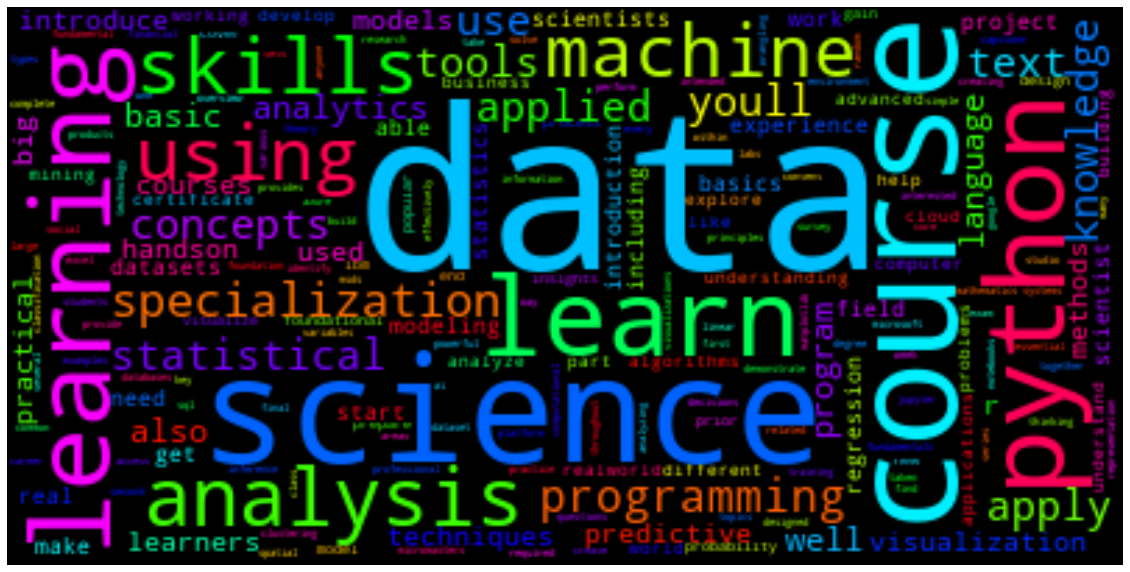

In [40]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(word_freq_generic)
plt.figure(figsize=(20,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

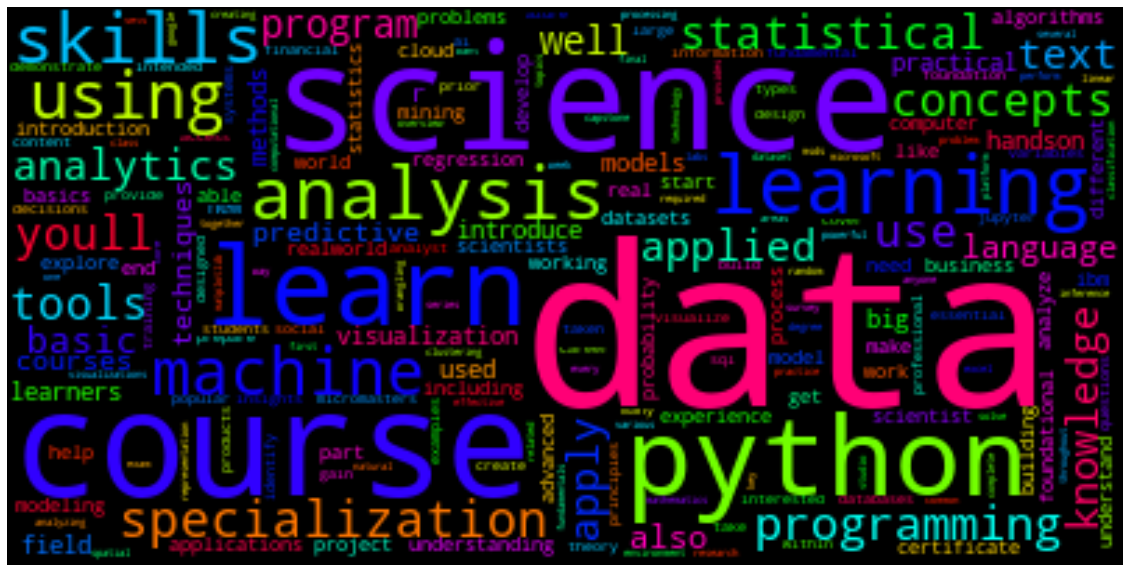

In [41]:
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(word_freq_generic_course)
plt.figure(figsize=(20,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

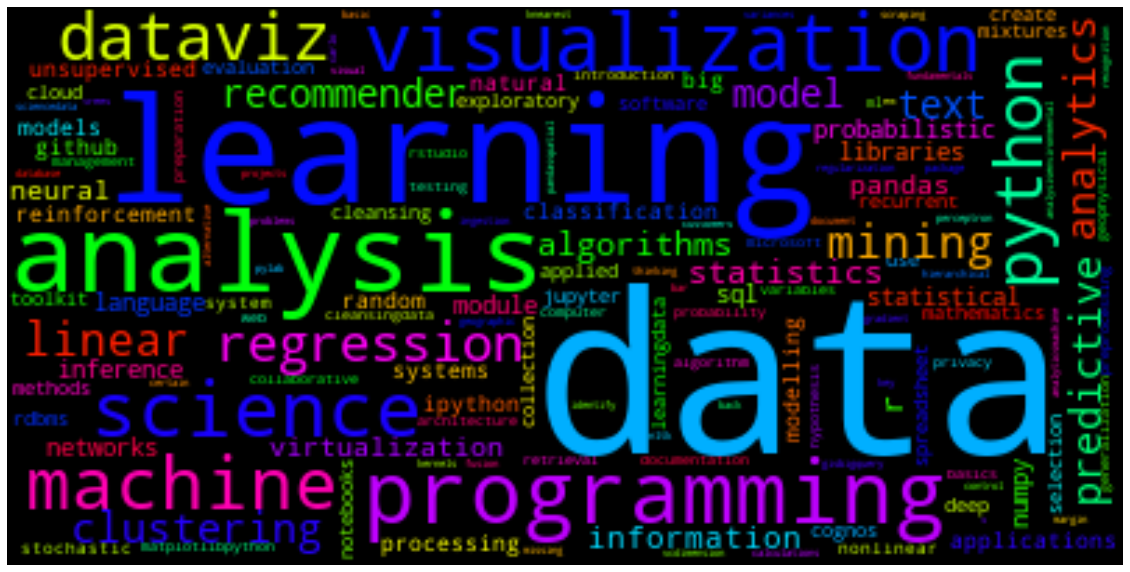

In [42]:
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(word_freq_generic_skills)
plt.figure(figsize=(20,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

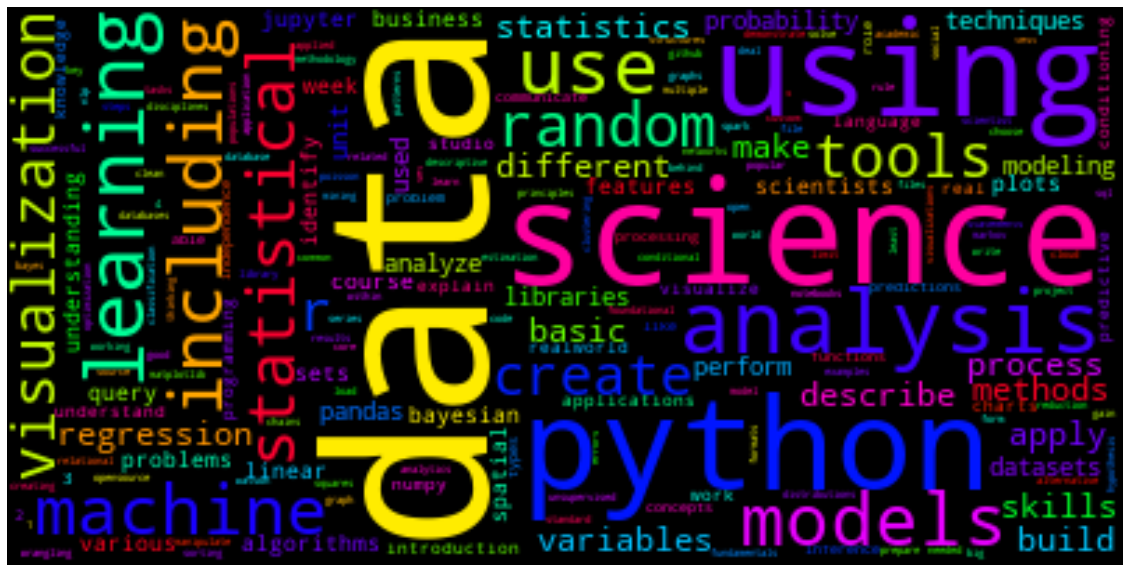

In [43]:
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(word_freq_generic_topics)
plt.figure(figsize=(20,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()